# Where should I go for my next ski holiday?
I want to go snowboarding somewhere new where there is great snow and a great experience for me and my partner. In order to do this, I wanted to acquire data for as many ski resorts as possible. So, I scraped the www.skiresort.info website to get as much basic information on over 5000 ski resorts across the world.

The data contains details about the location, numbers of lifts, statistics on the slopes and ratings for a number of descriptive features about the ski resort.

Below is the explortory data analsyis of the data i collected.

1. **Data Description**

2. **Data Cleaning**

   2.1. **Dealing with missing values**

      2.1.1. **Notes**

   2.2 **Other missing values**
   

3. **Exploratory Data Analysis**

   3.1. **Where are all the Ski Resorts?**

   3.2. **Where are the highest ski resorts?**

   3.3. **What is the distribution of easy, intermediate and advanced runs?**

   3.4. **How many of all resorts have less than 20 km of skiable terrain in each ability level?**
   

4. **Conslusion**

   4.1. **Additional features I would like to see with this dataset**
  
   4.2. **Other questions that would be interesting to investigate.**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets load the data and start having a look
data = pd.read_csv("skiResort.csv", encoding = "ISO-8859-1")
data.head()

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,...,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005,4.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330,107.0,202.0,103.0,NaN,...,5.0,5.0,3.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760,20.0,27.0,21.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680,3.5,0.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040,5.0,2.0,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Lets have a look at the feature name
list(data)

['Resort Name',
 'Continent',
 'Country',
 'State/Province',
 'URL',
 'Altitude',
 'Easy',
 'Intermediate ',
 'Difficult',
 'Funicular',
 'Circulating ropeway/gondola lift',
 'Chairlift',
 'T-bar lift/platter/button lift ',
 'Sunkid Moving Carpet',
 'Adult',
 'Youth',
 'Child',
 'Currency',
 'Ski resort size ',
 'Slope offering, variety of runs ',
 'Lifts and cable cars ',
 'Snow reliability ',
 'Slope preparation ',
 'Access, on-site parking ',
 'Orientation (trail map, information boards, sign-postings) ',
 'Cleanliness and hygiene ',
 'Environmentally friendly ski operation ',
 'Friendliness of staff ',
 'Mountain restaurants, ski huts, gastronomy ',
 'Après-ski ',
 'Accommodation offering directly at the slopes and lifts ',
 'Families and children ',
 'Beginners ',
 'Advanced skiers, freeriders ',
 'Snow parks ',
 'Cross-country skiing and trails ',
 'Aerial tramway/reversible ropeway',
 'Rope tow/beginner lift',
 'People mover',
 'Combined installation (gondola and chair)',
 'Cog 

## Data Description
Here we can see what information we have about each of the ski resorts. Below is a desription of what each feature represents.

- **Resort Name**: The name of the resort.
- **Continent**: The continent the resort is located in.
- **Country**: The country the resort is located in.
- **State/Province**: Further refinement of the resort location to state or province level.
- **URL**: The URL that the majority of the data was extracted from.
- **Altitude**: The elevation in metres above sea level.
- **Easy**: The cumulative distance of beginner slopes in km.
- **Intermediate**: The cumulative distance of intermediate slopes in km.
- **Difficult**: The cumulative distance of difficult slopes in km.
- **Funicular**: The number of cable car tram's capable of carrying 100's of passengers from the base to the top of the mountain.
- **Circulating ropeway/gondola lifts**: The number of gondola lifts available.
- **Chairlift**: The number of chair lifts available.
- **T-bar lift/platter/button lift**: The number of T-bar lifts available.
- **Sunkid Moving Carpet**: The number of Sunkid moving carpets available.
- **Adult**: The estimated price of an adult (typically age > 16 ) ski pass in local currency.
- **Youth**: The estimated price of an youth ski (typically 6 > age > 16) pass in local currency.
- **Child**: The estimated price of an child (typically age < 6) ski pass in local currency.
- **Currency**: The definition of the local currency
- **Ski resort size**: A rating (out of 5 stars) for the size of the resort.
- **Slope offering, variety of runs**: A rating (out of 5 stars) for the slope offering of the resort.
- **Lifts and cable cars**: A rating (out of 5 stars) for the number, quality and capacity of the lifts at the resort.
- **- **Snow reliability**: A rating (out of 5 stars) for the reliability and quality of the snow.
- **Slope preparation**: A rating (out of 5 stars) for the quality of the slope preperation.
- **Access, on-site parking**: A rating (out of 5 stars) for the parking accessibility of the resort.
- **Orientation (trail map, information boards, sign-postings)**: A rating (out of 5 stars) for the presentation of the trail map as well as available information boards and sign postings on the slopes.
- **Cleanliness and hygiene**: A rating (out of 5 stars) for the apparent cleanliness of public spaces and access to public toilets.
- **Environmentally friendly ski operation**: A rating (out of 5 stars) for the environmentally freindliness of the resort.
- **Friendliness of staff**: A rating (out of 5 stars) for the friendliness of the staff.
- **Mountain restaurants/ski huts/gastronomy**: A rating (out of 5 stars) for the availablity and quality of the restaurants on the slopes.
- **Après-ski**: A rating (out of 5 stars) for the availability of bars and facilities off the mountain.
- **Accommodation offering directly at the slopes and lifts**: A rating (out of 5 stars) for the availability and selection of accomodation on and off the slopes.
- **Families and children**: A rating (out of 5 stars) for the family friendliness of the resort.
- **Beginners**: A rating (out of 5 stars) for the number and length of the beginner slopes.
- **Advanced skiers/freeriders**: A rating (out of 5 stars) for the number and length of the advanced slopes.
- **Snow parks**: A rating (out of 5 stars) for the quality and selection of the snow parks on the slopes.
- **Cross-country skiing and trails**: A rating (out of 5 stars) for the availability and length of cross country skiing trails.
- **Aerial tramway/reversible ropeway**: The number of aerial tramway lifts available.
- **Rope tow/beginner lift**: The number of rope tow lifts available.
- **People mover**: The number of people mover conveyor belt lifts available.
- **Combined installation (gondola and chair)**: The number of combined char lift and gondola lifts available.
- **Cog railway**: The number of cog railway lifts available.
- **Helicopter for Heli-skiing**: The number of heli skiiing options available.
- **Snow caterpillars for Cat-skiing**: The number of caterpiller skiing options available.

All ratings are decided by ski.resort.info staff after a site visit.

---

## Data Cleaning
Dealing with missing values
A number of the features have missing values, these need to be corrected. These values will need to reflect the intention of each specific feature. A NaN for a rating will mean something different to a NaN for the number of a particular type of lift available.

It makes sence to fill in the lift columns before examining the remaining missing values as a missing value here, just means the resort doesn't have a lift of this type.

In [4]:
# For those features that are types of lifts, we will just replace the NaNs with 0 
# to indicate there are no lifts of this type at these ski resorts.

# Here is a list of all the lift types.
listOfLifts = ['Funicular',
               'Circulating ropeway/gondola lift',
               'Chairlift', 
               'T-bar lift/platter/button lift ', 
               'Sunkid Moving Carpet', 
               'Aerial tramway/reversible ropeway', 
               'Rope tow/beginner lift', 
               'People mover', 
               'Combined installation (gondola and chair)', 
               'Cog railway', 
               'Helicopter for Heli-skiing', 
               'Snow caterpillars for Cat-skiing']

data[listOfLifts] = data[listOfLifts].fillna(0)
data.head()

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,...,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005,4.0,3.0,2.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330,107.0,202.0,103.0,0.0,...,5.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760,20.0,27.0,21.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680,3.5,0.5,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040,5.0,2.0,2.5,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, any remaining missing values are really missing. Lets have a look at how many missing values we have.

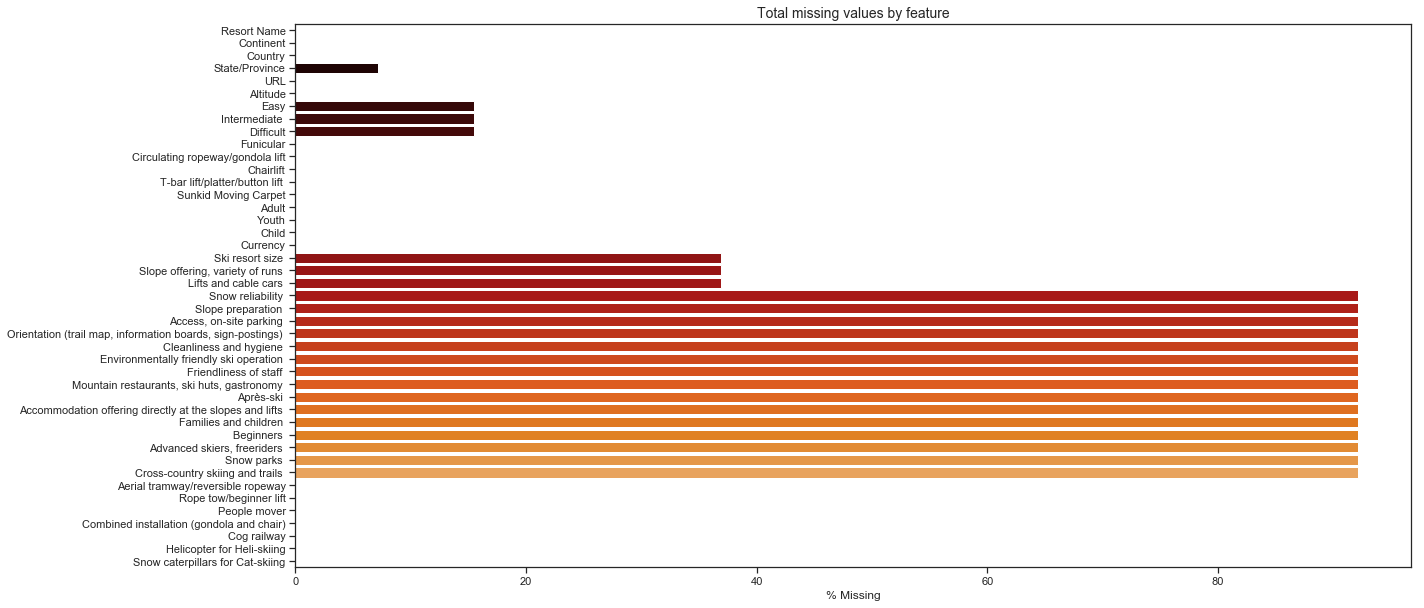

In [5]:
# Collect the total number of missing values for each feature.
missing = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()) * 100
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])

# Show the total missing values.
plt.figure(figsize=(20,10))
ax = sns.barplot(y=missing_data.index, x='Percent' ,data=missing_data, palette="gist_heat", orient='h')
plt.xlabel('% Missing')
plt.title('Total missing values by feature', loc='Center', fontsize=14)
plt.show()


In [6]:
totalMissing = data.isnull().sum().sum() / (np.shape(data)[0]*np.shape(data)[1]) *100
print ("Total missing value consist of {0:5.2f} % of the total data".format(totalMissing))

Total missing value consist of 35.97 % of the total data


There is a large amount of the ratings that are missing, indicating that the skiresort.info staff have not made a site visit to evaluate these features of the resort.

We need to consider this when making any conclusions on the data. It would even be acceptable to drop these features from the data, but we will keep them in for now and not use them in any further analysis.

In [7]:
# For the features that are ratings, the missing values indicate a site visit has not been completed by 
# skiresort.info staff. So we will replace these values with the average value for each rating according 
# to each country. If there are no values for an entire country, the value will be an overall average 
# rating of 2.5.

# List the ratings features.
listOfRatings = ['Ski resort size ', 
                 'Slope offering, variety of runs ', 
                 'Lifts and cable cars ', 
                 'Snow reliability ', 
                 'Slope preparation ', 
                 'Access, on-site parking ', 
                 'Orientation (trail map, information boards, sign-postings) ', 
                 'Cleanliness and hygiene ', 
                 'Environmentally friendly ski operation ', 
                 'Friendliness of staff ', 
                 'Mountain restaurants, ski huts, gastronomy ', 
                 'Après-ski ', 
                 'Accommodation offering directly at the slopes and lifts ', 
                 'Families and children ', 
                 'Beginners ', 
                 'Advanced skiers, freeriders ', 
                 'Snow parks ',
                 'Cross-country skiing and trails ']

# Fill the missing ratings with the average rating for each feature according to the country 
# location. Fill any further missing averages with an average rating of 2.5
averageRatings = data.groupby('Country')[listOfRatings].transform('mean').fillna(2.5)
data[listOfRatings] = data[listOfRatings].fillna(averageRatings)

data.head()

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,...,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
0,3-5-pigadia-naoussa,Europe,Greece,Central Macedonia,http://www.skiresort.info/ski-resort/3-5-pigad...,2005,4.0,3.0,2.0,0.0,...,2.500000,2.500000,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4-vallees-verbierla-tzoumaznendazveysonnazthyon,Europe,Switzerland,Lemanic Region,http://www.skiresort.info/ski-resort/4-vallees...,3330,107.0,202.0,103.0,0.0,...,5.000000,5.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760,20.0,27.0,21.0,0.0,...,4.500000,4.500000,2.550000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aadneram-skitrekk,Europe,Norway,Vest-Agder,http://www.skiresort.info/ski-resort/aadneram-...,680,3.5,0.5,0.0,0.0,...,2.928571,4.214286,4.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aal-skisenter,Europe,Norway,Buskerud,http://www.skiresort.info/ski-resort/aal-skise...,1040,5.0,2.0,2.5,0.0,...,2.928571,4.214286,4.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Notes
If we were planing on running any machine learning models through the data do extract some insight, we would probably want to think about scaling some of the features, like Altitude and the length of the Easy, Intermediate and Advance trails.

We dont plan on doing this for now, so we will leave these values as they are.

In [8]:
# There are still some features that contain missing values.
data.isnull().sum().head(10)

Resort Name         0
Continent           0
Country             0
State/Province    395
URL                 0
Altitude            0
Easy              850
Intermediate      850
Difficult         850
Funicular           0
dtype: int64

### Other missing values
There is 395 resorts that have not got a location named for the state/province level, and 850 resorts that dont have information on the breakup of the slope difficulty.

We could use machine learning to try to figure out the 350 locations of the ski resorts, but this would likely be influenced by the missing values we have already replaced.

For the 850 resorts with missing slope difficulty information, we can consider what information these features describe. The slope difficulty of the full resort is described by all three features "Beginner", "Intermediate" and "Difficult" (the total adds to 100%). This suggests that we could assume that the 850 missing values represent the same 850 ski resorts.

In [9]:
# We will fill in State/Province missing values with a non descript label "Not Specified". 
data['State/Province'] = data['State/Province'].fillna('Not Specified')

# Next, fill in the missing values for the slope difficulty. These missing values means that 
# skiresort.info could not obtain the information about the distance of runs in each category.
# So we will replace the values with, 0
difficulty = ['Easy', 'Intermediate ', 'Difficult']
data[difficulty]= data[difficulty].fillna(0)

data.isnull().sum()

Resort Name                                                    0
Continent                                                      0
Country                                                        0
State/Province                                                 0
URL                                                            0
Altitude                                                       0
Easy                                                           0
Intermediate                                                   0
Difficult                                                      0
Funicular                                                      0
Circulating ropeway/gondola lift                               0
Chairlift                                                      0
T-bar lift/platter/button lift                                 0
Sunkid Moving Carpet                                           0
Adult                                                          0
Youth                    

We now have a clean data set ready for analysis.

---
## Exploratory Data Analysis
### Where are all the Ski Resorts?
Lets see if we can find where all the ski resorts are around the world.

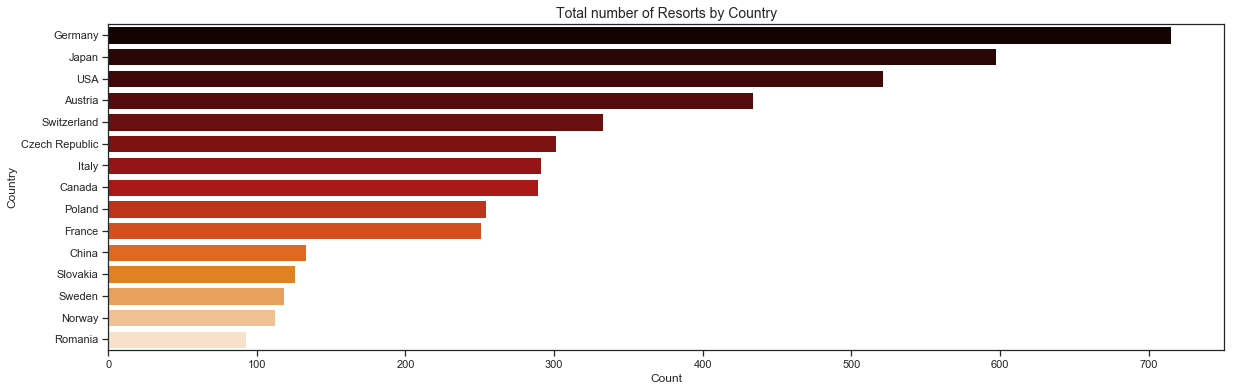

In [10]:
# Group the ski resorts by country
skiResort_Country = data.groupby('Country')[['Country']].count()
skiResort_Country = skiResort_Country.rename(columns={"Country": "Count"})
skiResort_Country = skiResort_Country.sort_values(by='Count', ascending=False)
# Lets just take a look at the top 15 countries
skiResort_Country_short = skiResort_Country.head(15)

plt.figure(figsize=(20,6))
sns.barplot(y=skiResort_Country_short.index, x='Count' ,data=skiResort_Country_short, palette="gist_heat", orient='h')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Total number of Resorts by Country', loc='Center', fontsize=14)
plt.show()


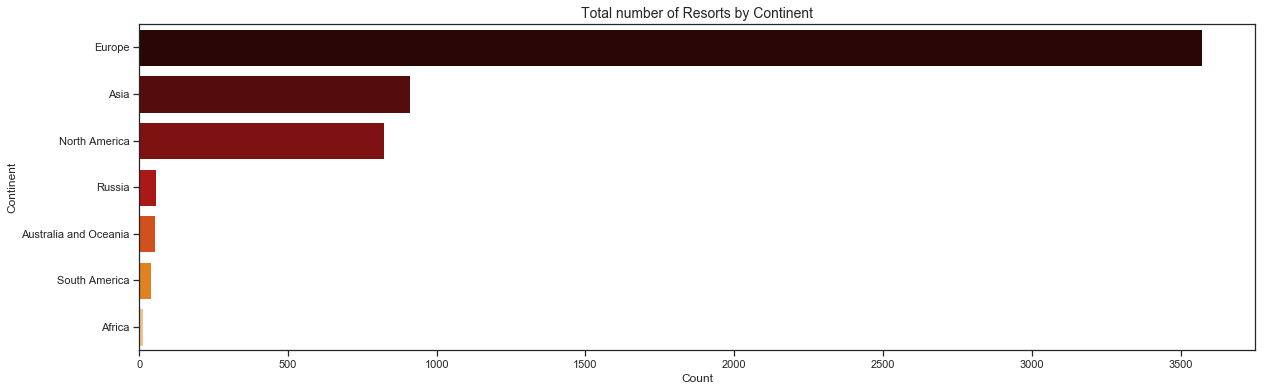

In [11]:
# Lets group the data by continent
skiResort_Continent = data.groupby('Continent')[['Continent']].count()
skiResort_Continent = skiResort_Continent.rename(columns={"Continent": "Count"})
skiResort_Continent = skiResort_Continent.sort_values(by='Count', ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(y=skiResort_Continent.index, x='Count' ,data=skiResort_Continent, palette="gist_heat", orient='h')
plt.xlabel('Count')
plt.ylabel('Continent')
plt.title('Total number of Resorts by Continent', loc='Center', fontsize=14)
plt.show()


In [12]:
# Lets have a look the actual numbers by country.
skiResort_Country['Percent'] = skiResort_Country/skiResort_Country.sum()*100
skiResort_Country.head(10)

,Count,Percent
Country,,
Germany,715,13.071298
Japan,597,10.914077
USA,521,9.524680
Austria,434,7.934186
Switzerland,333,6.087751
Czech Republic,301,5.502742
Italy,291,5.319927
Canada,289,5.283364
Poland,254,4.643510


In [13]:
# Lets have a look the actual numbers by continent.
skiResort_Continent['Percent'] = skiResort_Continent/skiResort_Continent.sum()*100
skiResort_Continent

,Count,Percent
Continent,,
Europe,3572,65.301645
Asia,910,16.636197
North America,822,15.027422
Russia,57,1.042048
Australia and Oceania,55,1.005484
South America,40,0.731261
Africa,14,0.255941


It turns out the top 5 countries contain 47.5% of the worlds ski resorts.

Europe contains 65% of the worlds ski resorts. Doing a little research reveals that Europe is only the 6th (out of 7) largest continent with 10M km2 of land mass, which indicates the majority of these ski resorts will be small. If we had more reliable information about the resort size ratings, we could check to see if these vaues are lower than, say 3.

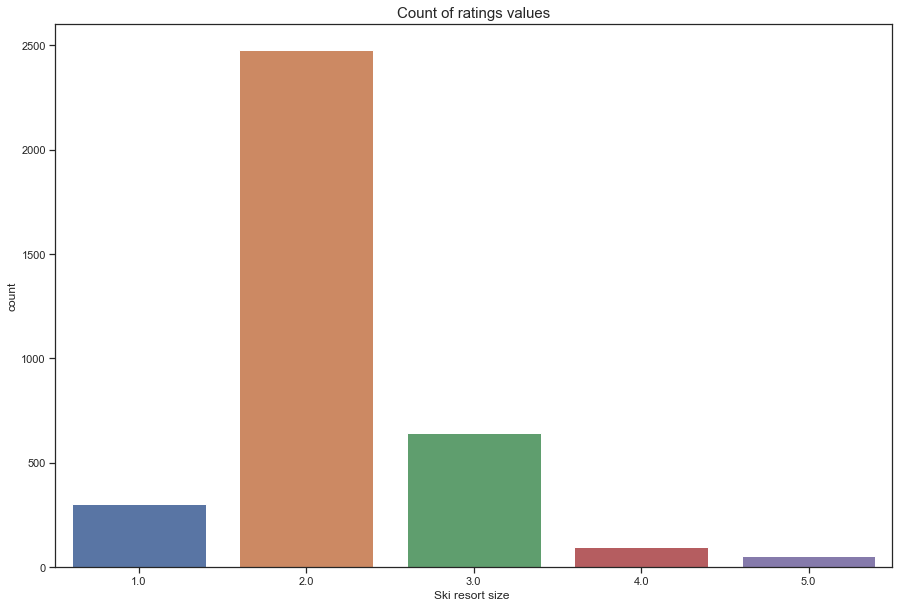

In [14]:
Europe = data[data['Continent'] == 'Europe']
Europe.head()
Europe['Ski resort size '][Europe['Ski resort size '] <= 1] = 1
Europe['Ski resort size '][(Europe['Ski resort size '] > 1) & (Europe['Ski resort size '] <= 2)] = 2
Europe['Ski resort size '][(Europe['Ski resort size '] > 2) & (Europe['Ski resort size '] <= 3)] = 3
Europe['Ski resort size '][(Europe['Ski resort size '] > 3) & (Europe['Ski resort size '] <= 4)] = 4
Europe['Ski resort size '][Europe['Ski resort size '] > 4] = 5

plt.figure(figsize=(15,10))
sns.countplot(x='Ski resort size ',data = Europe)
plt.title('Count of ratings values',fontsize=15)
plt.show()

We can see that most of the resort size ratings are 1 or 2, suggesting that we were right to claim that the majority of the ski resorts in Europe are small.

However, because it appears that many of the ski resorts in Europe were filled with the average value for the specific country. As given by the non integer values on the x-axis, we will have to do a little more investigation into these resorts. Something to do for future analysis.

---

### Where are the highest ski resorts?
A High elevation implies there will be plenty of snow available.

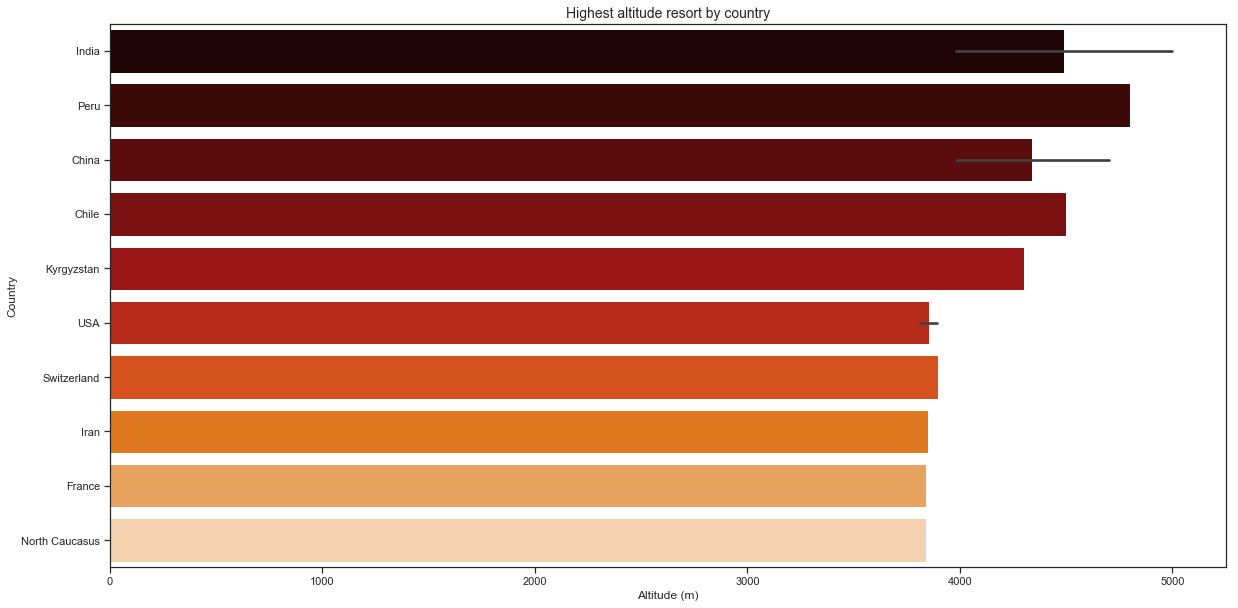

In [22]:
# Sort the data by altitude.
altitude = data.sort_values(by='Altitude', ascending=False)#.head(15)
sample = altitude.head(15)

# Display the top 15 countries with high elevation ski resorts
plt.figure(figsize=(20,10))
sns.barplot(y="Country", x="Altitude" ,data=sample, palette="gist_heat", orient='h')
plt.xlabel('Altitude (m)')
plt.ylabel('Country')
plt.title('Highest altitude resort by country', loc='Center', fontsize=14)
plt.show()

### What is the distribution of easy, intermediate and advanced runs?

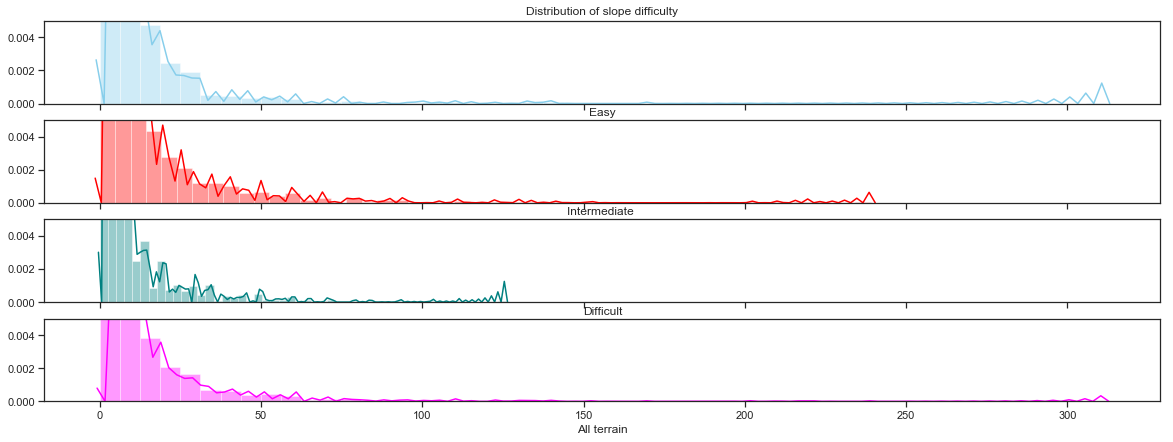

In [16]:
# Get the slope difficulty columns and combine them into one data series.
terrain = [data['Easy'], data['Intermediate '], data['Difficult']]
totalSkiableTerrain = pd.concat(terrain)

# Display the distribution of each ability level and the combination of all three levels as one
fig, axes = plt.subplots(4, figsize=(20, 7), sharex=True)
sns.distplot(data['Easy'],color='skyblue',ax=axes[0])
axes[0].set_ylim(0,0.005)
sns.distplot(data['Intermediate '],color='red',ax=axes[1])
axes[1].set_ylim(0,0.005)
sns.distplot(data['Difficult'],color='teal',ax=axes[2])
axes[2].set_ylim(0,0.005)
sns.distplot(totalSkiableTerrain,color='magenta',ax=axes[3])
axes[3].set_xlabel('All terrain')
axes[3].set_ylim(0,0.005)
axes[0].set_title('Distribution of slope difficulty')

plt.show()


It is expected that we would see the majority of the ski resorts have less than 50 km of skiable terrain for each ability level.

We can see that some resorts have over 300km of easy terrain, making it perfect for beginners. There seems to be a slight peak in the number of resorts at the high end of total skiable terrain for each category. This may suggest that some resorts try to customise their terrain for specific ability to set themselve apart from the rest.

I think it would be interesting to see which resorts have the maximum skiable terrain for each ability level.

In [17]:
# Lets find out what resort has the largest amount of skiable terrain for beginners.
data[data['Easy'] == data['Easy'].max()]

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,...,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
2529,les-3-vallees-val-thorensles-menuiresmeribelco...,Europe,France,Auvergne-Rhone-Alpes,http://www.skiresort.info/ski-resort/les-3-val...,3230,312.0,216.0,72.0,0.0,...,5.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Lets find out what resort has the largest amount of skiable terrain for intermediate skiers.
data[data['Intermediate '] == data['Intermediate '].max()]

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,...,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
2564,les-sybelles-le-corbierla-toussuireles-bottier...,Europe,France,Auvergne-Rhone-Alpes,http://www.skiresort.info/ski-resort/les-sybel...,2620,53.0,239.0,18.5,0.0,...,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Lets find out what resort has the largest amount of skiable terrain for advanced skiers.
data[data['Difficult'] == data['Difficult'].max()]

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,...,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
449,big-sky-resort,North America,USA,Montana,http://www.skiresort.info/ski-resort/big-sky-r...,3398,55.0,69.0,126.0,0.0,...,4.5,4.5,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So it looks like the two ski resorts that have the most skiable terrain for easy and intermediate skiers are only 1.5 hours drive apart, and only 30 km (as the crow flies). See driving directions between [les 3 Valees and les Sybelles].

If these two resorts offer a linked ski pass, it might be a great place to go with all the variety available.

[les 3 Valees and les Sybelles]:(https://www.google.com.au/maps/dir/Le+Corbier+Les+Sybelles,+Le+Tripode,+73300+Villarembert,+France/Les+3+Vall%C3%A9es,+378+Avenue+de+Belleville,+73600+Moutiers,+France/@45.4264803,6.04325,9z/data=!4m14!4m13!1m5!1m1!1s0x478a3bb4a82e655f:0x577f8d9eb99d884e!2m2!1d6.268209!2d45.239654!1m5!1m1!1s0x478a2af70760be33:0x36f9186d4373f195!2m2!1d6.5252551!2d45.4839681!3e0)

---

### How many of all resorts have less than 20 km of skiable terrain in each ability level?

In [20]:
# Get the ratio of skiable terrain that is less that 20 km in each ability level.
Easy20 = data[data['Easy'] <= 20]['Easy'].sum()/data['Easy'].sum()
Intermediate20 = data[data['Intermediate '] <= 20]['Intermediate '].sum()/data['Intermediate '].sum()
Difficult20 = data[data['Difficult'] <= 20]['Difficult'].sum()/data['Difficult'].sum()

# Display the results in terms of percentage.
print ("Easy terrain < 20km: {0:5.2f} %".format(Easy20*100))
print ("Intermediate terrain < 20km: {0:5.2f}  %".format(Intermediate20*100))
print ("Difficult terrain < 20km: {0:5.2f}  %".format(Difficult20*100))

Easy terrain < 20km: 57.89 %
Intermediate terrain < 20km: 45.97  %
Difficult terrain < 20km: 60.70  %


The vast majority of ski resorts have less than 20 km of skiable terrain in any specific difficulty level.

- The resorts that have less than 20 km of beginner terrain consist of ~58% of all ski resorts.
- The resorts that have less than 20 km of intermediate terrain consist of ~46% of all ski resorts.
- The resorts that have less than 20 km of difficult terrain consist of ~61% of all ski resorts.

---

## Conclusion
Personally, I feel that there is insufficient data here to make a real informed decision on where I will actually go for my next ski holiday, as I would like more information about the resorts listed here. Particularly the ratings should alteast be populated for most of the resorts.

We saw that there was over 90% missing values for most ratings features, and 36 % overal. This could potentially bias the results towards resorts that have a complete set of features.

### Additional features I would like to see with this dataset
- Ratings features to be mostly complete
- The average snow base
- Historical snow falls
- Skiable area of the resort
- Resort reviews

### Other questions that would be interesting to investigate.
- The proximity of other resorts (other resorts that are linked)
- Have a closer look at those ski resorts with high skiable terrains